In [1]:
#EDA
#Loading the data using pandas as pd
import pandas as pd
df = pd.read_csv("C:\\Users\\moham\\Downloads\\Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
#  1.Data Cleaning and Preparation:
# ●	Handle missing values appropriately (e.g., imputation, deletion).
# ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
# ●	Detect and treat outliers if necessary.

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Correcting  inconsistencies in data types

# Detect and treat outliers (e.g., using IQR method)
# For each numerical feature:
for column in df.select_dtypes(include=['number']):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print the cleaned dataframe
print(df)


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
         LB        AC        FM        UC        DL   DS   DP  ASTV  MSTV  \
1     132.0  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   2.1   
2     133.0  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   2.1   
58    148.0  0.000000  0.000000  0.005181  0.000000  0.0  0.0  41.0   0.8   
59    144.0  0.008143  0.000000  0.006595  0.000000  0.0  0.0  33.0   1.1   
61    146.0  0.004580 -0.001776  0.004580  0.000000  0.0  0.0  39.0   0.8   
...     ...       ...

In [37]:
# statistical summary
summary = df.describe()

# Calculate median for all columns
median_values = df.median()

# Calculate interquartile range (IQR) for all numerical columns
iqr_values = df.quantile(0.75) - df.quantile(0.25)


print("Statistical Summary:")
print(summary)
print("\nMedian Values:")
print(median_values)
print("\nInterquartile Range (IQR):")
print(iqr_values)


#  highlighting interesting findings

print("\nInteresting Findings (example):")
#If the standard deviation of a feature is very large, it could mean that the feature has a wide range of 
#values and might be important for predicting the target variable.
if (df['LB'].std() > 10):
    print("The 'LB' feature has a high standard deviation, suggesting a wide range of values.")
# Example: If the mean and median are significantly different, the data might be skewed.
if (df['ASTV'].mean() - df['ASTV'].median() > 5):
    print("The 'ASTV' feature might be right-skewed as the mean is significantly higher than the median.")


Statistical Summary:
               LB          AC          FM          UC          DL     DS  \
count  904.000000  904.000000  904.000000  904.000000  904.000000  904.0   
mean   132.186337    0.003928    0.000581    0.004896    0.001520    0.0   
std      9.379489    0.003754    0.001296    0.002689    0.002255    0.0   
min    106.000000   -0.000122   -0.002076   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003103    0.000000    0.0   
50%    133.000000    0.003060    0.000000    0.004986    0.000000    0.0   
75%    139.000000    0.006595    0.000149    0.006839    0.002752    0.0   
max    160.000000    0.014068    0.006105    0.012072    0.008403    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  904.0  904.000000  904.000000  904.000000  904.000000  904.000000   
mean     0.0   42.851032    1.220650    4.375244    8.430429   65.712549   
std      0.0   15.145345    0.500114    8.289906    4.362057   31.

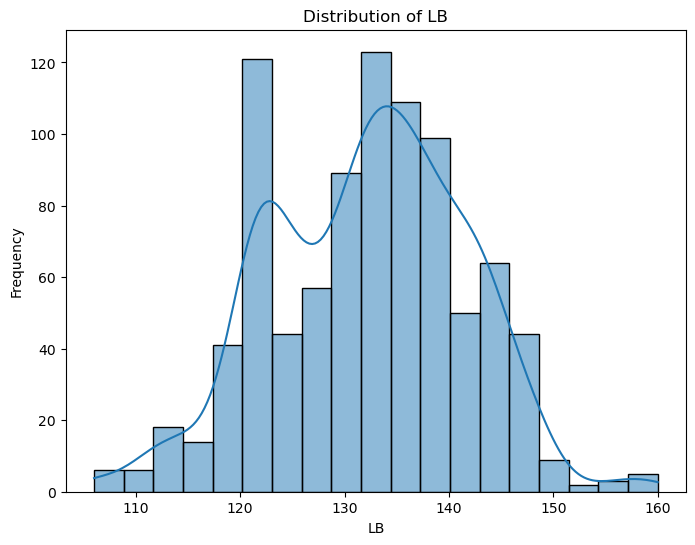

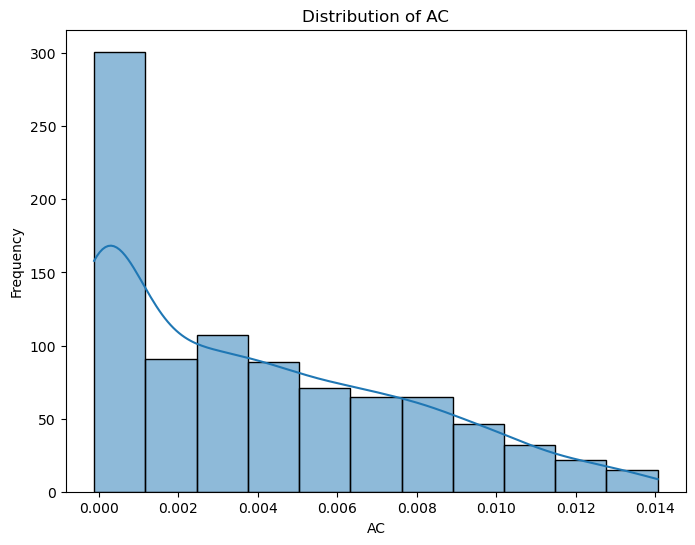

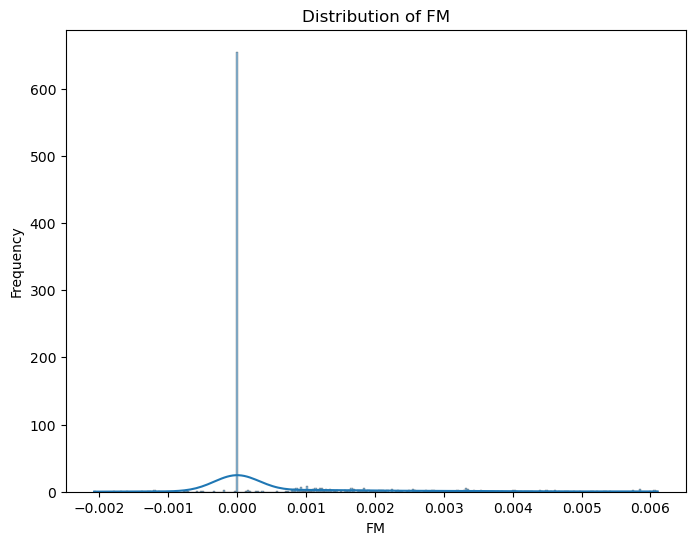

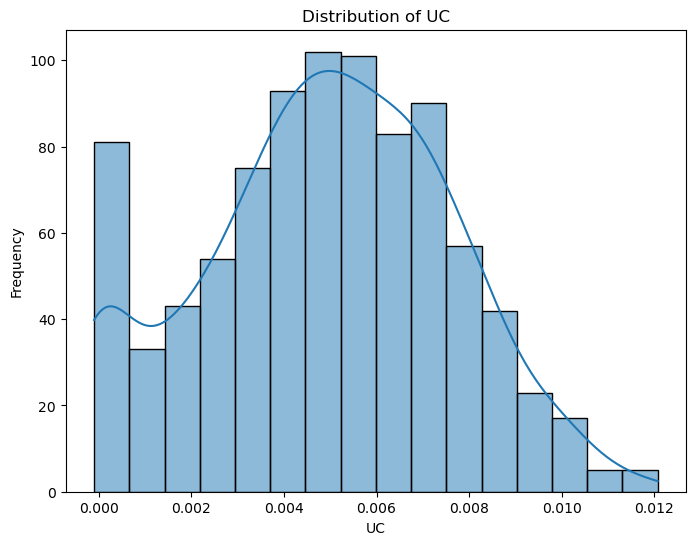

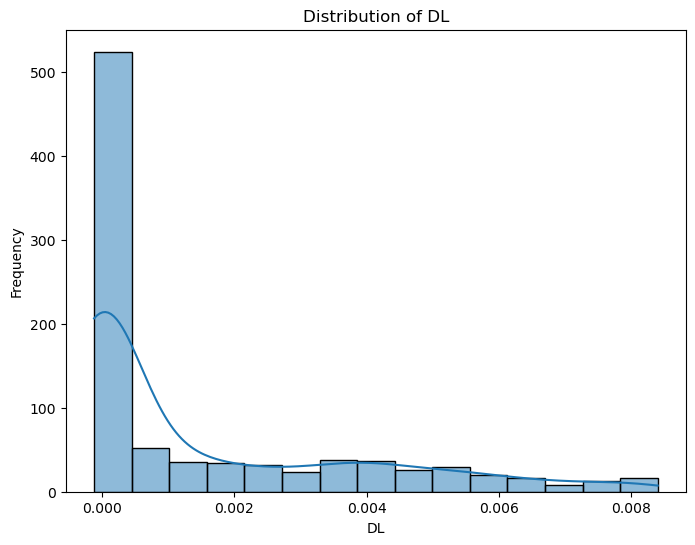

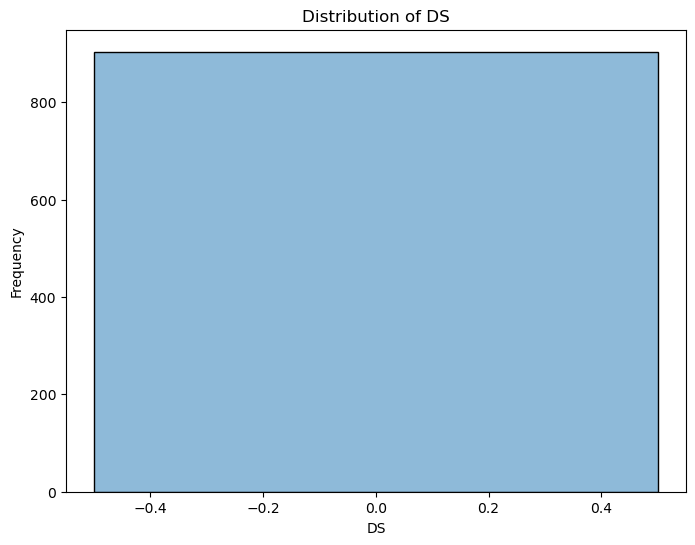

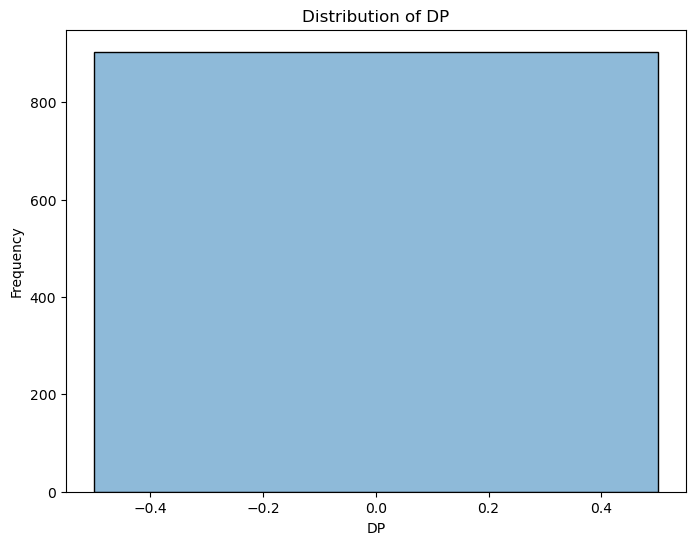

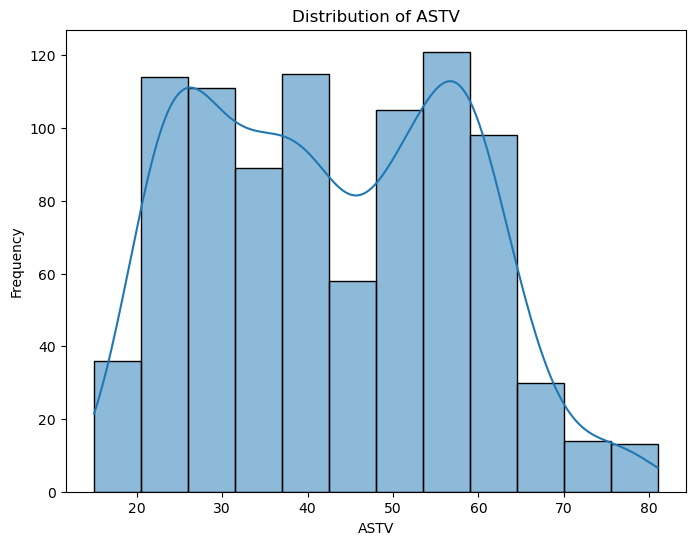

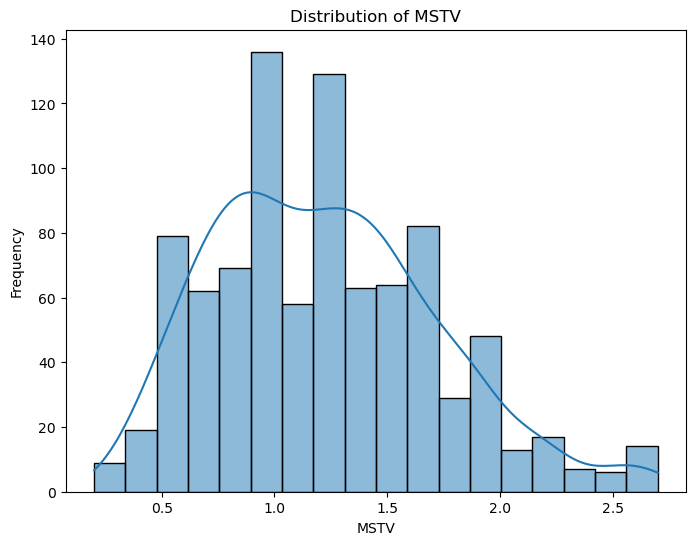

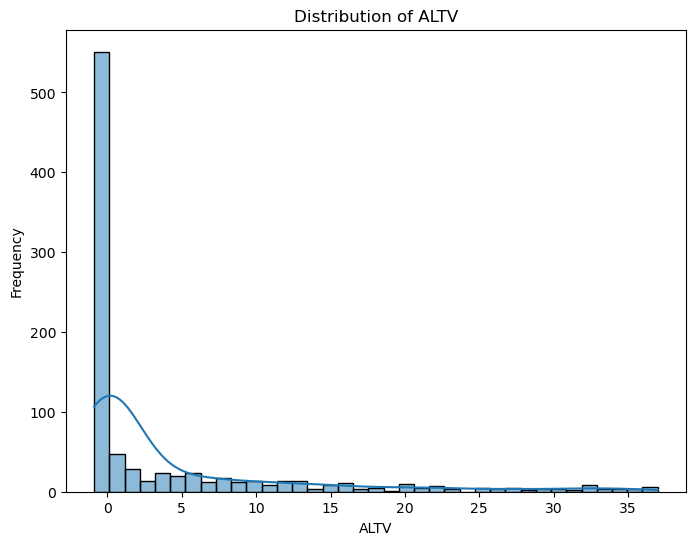

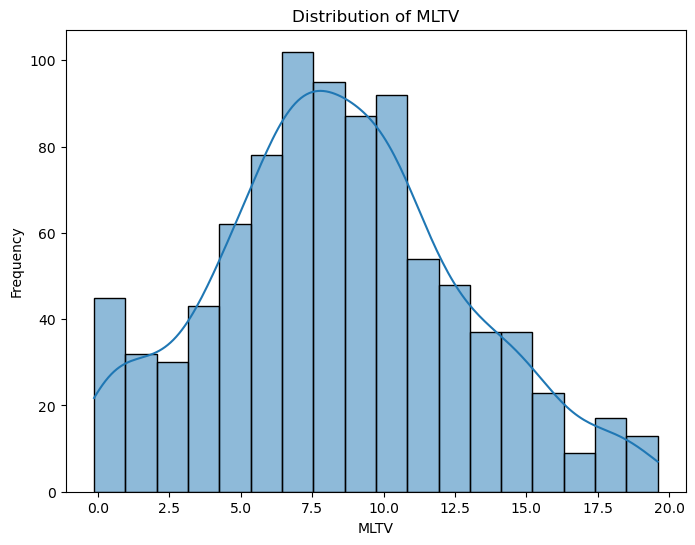

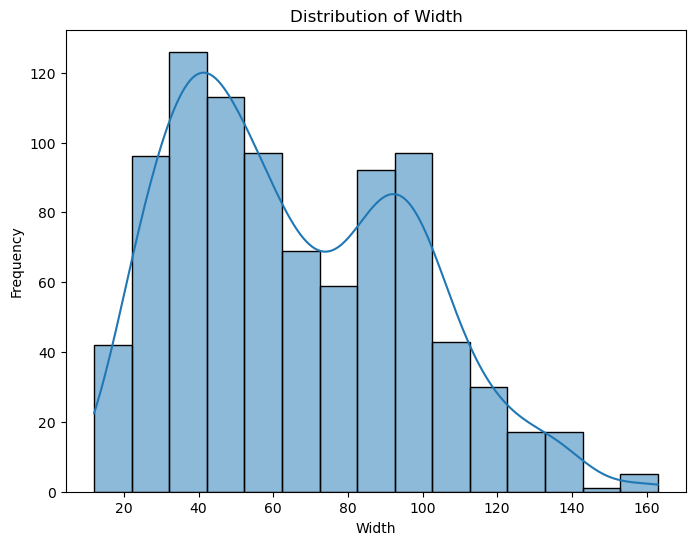

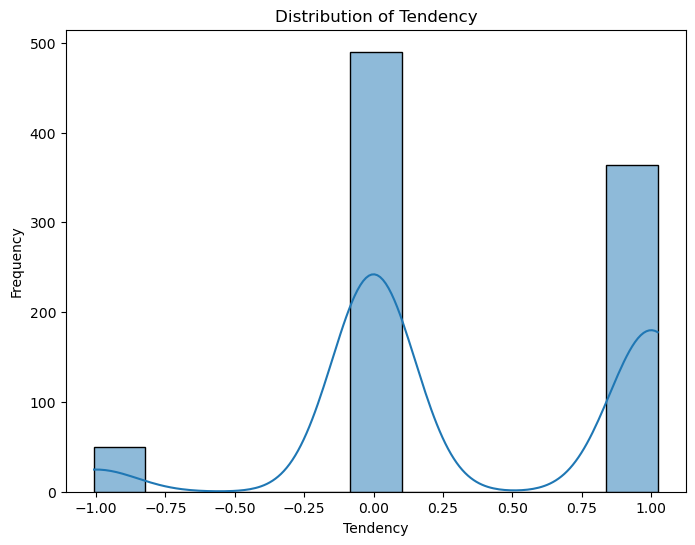

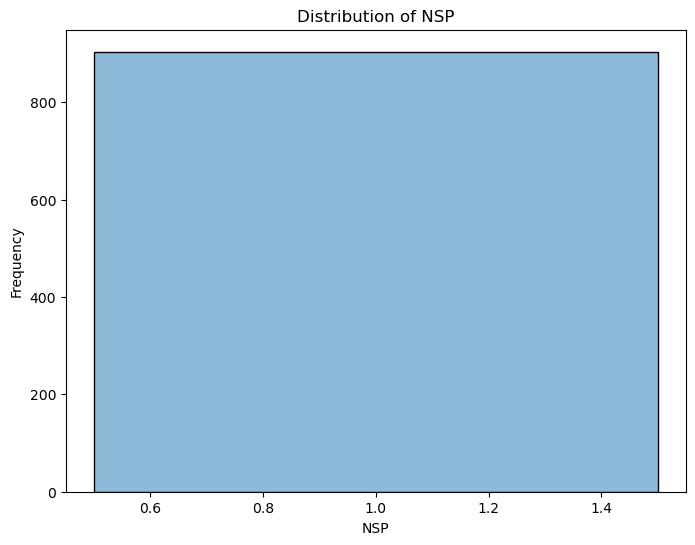

In [11]:
#  3.Data Visualization:
#There is option given between histograms and boxplot so i have chosen an histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Createing  histograms for numerical features
for column in df.select_dtypes(include=['number']):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


In [27]:
# Useing  bar charts to display the frequency of categories for categorical variables.
#There is option given between barcharts  and pie chart so i have chosen an barcharts

import matplotlib.pyplot as plt
# Create bar charts for categorical features
for column in df.select_dtypes(include=['object']):
  plt.figure(figsize=(8, 6))
  df[column].value_counts().plot(kind='bar')
  plt.title(f"Frequency of Categories for {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

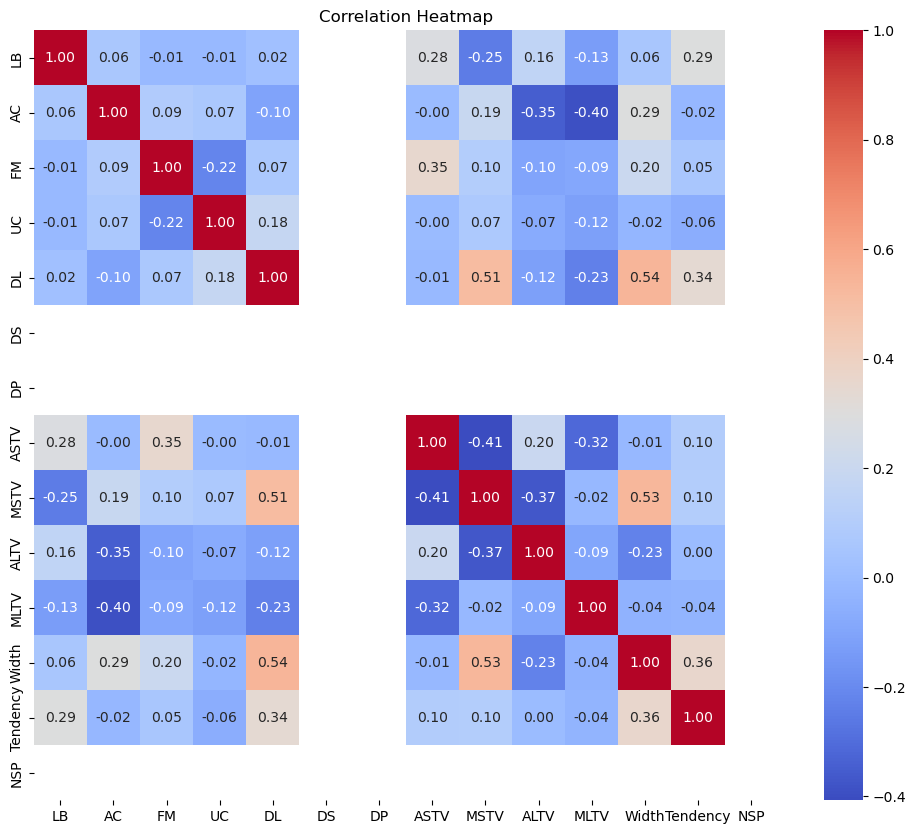

In [23]:
# correlation heatmaps to explore relationships between pairs of variables.
#There is option given between scatter plots  and correlation so i have chosen an correlation

# Generate a correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


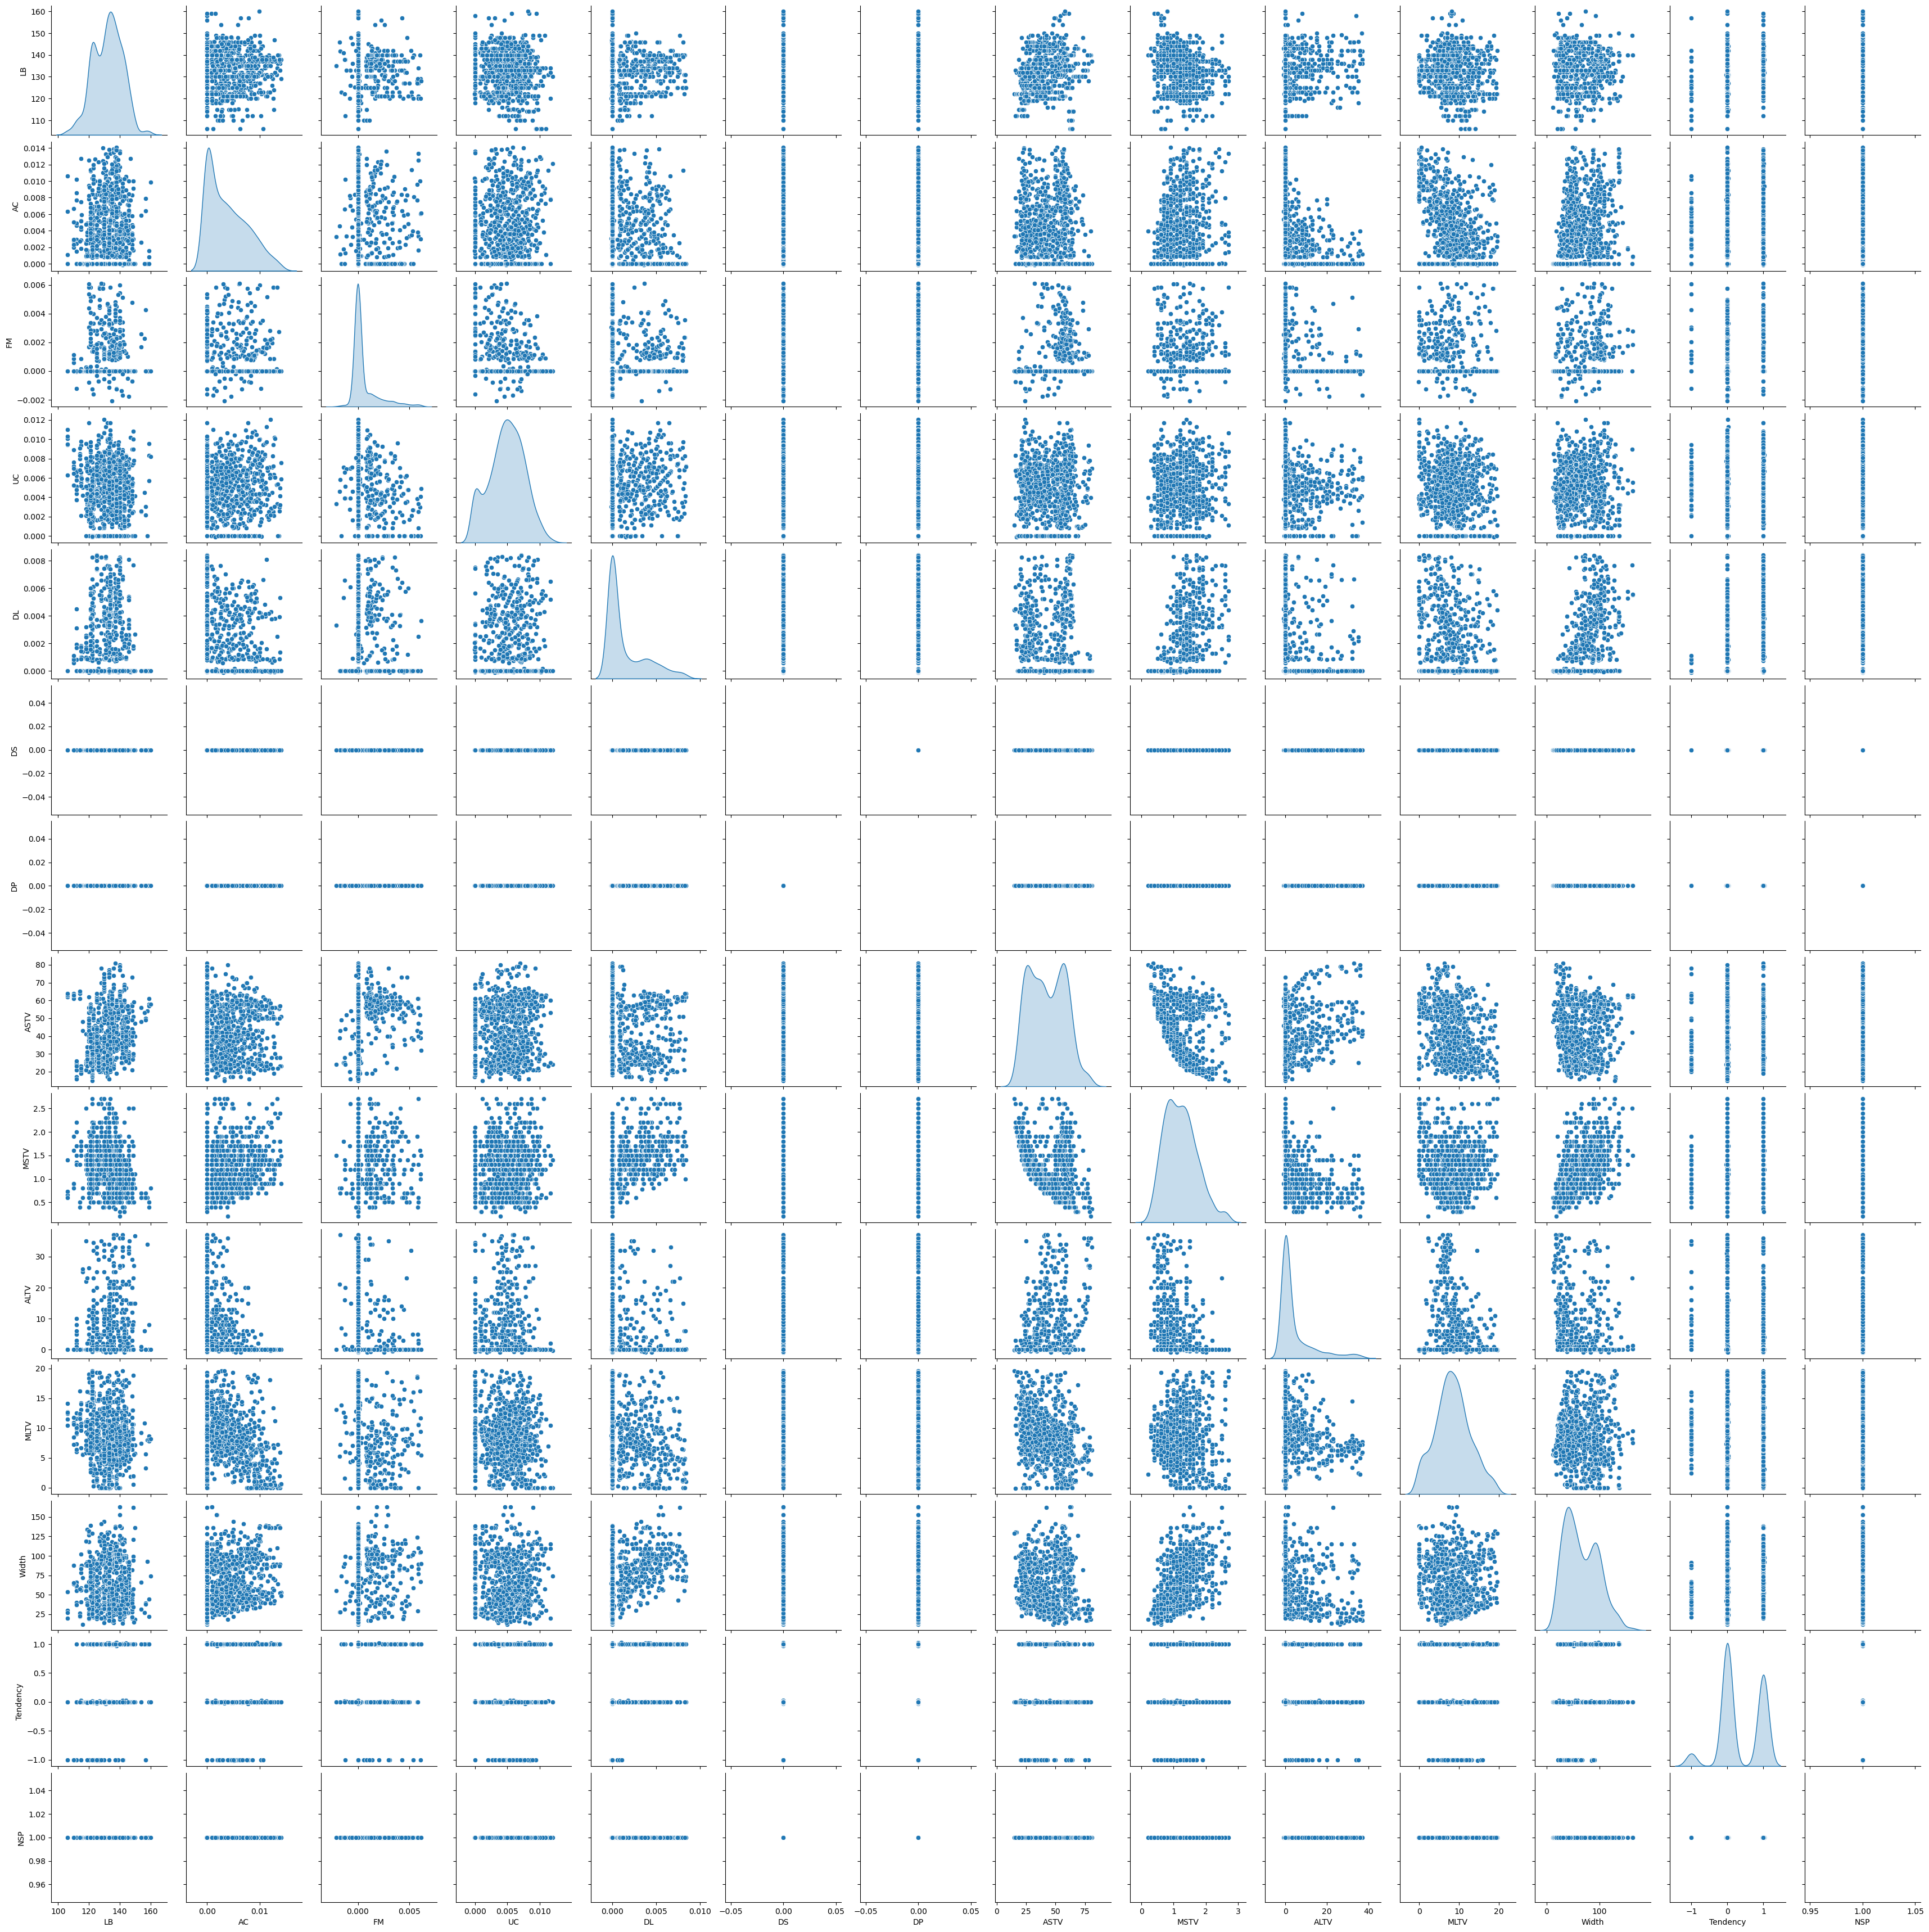

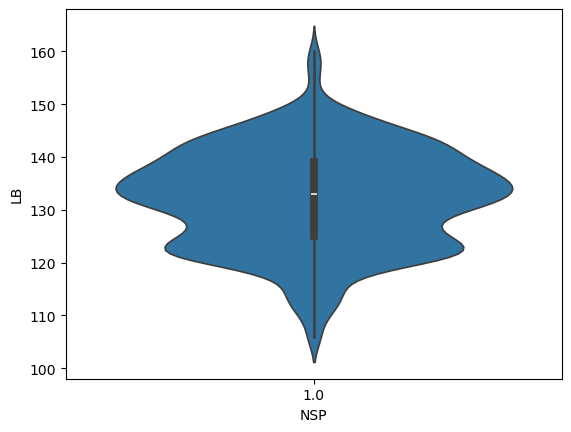

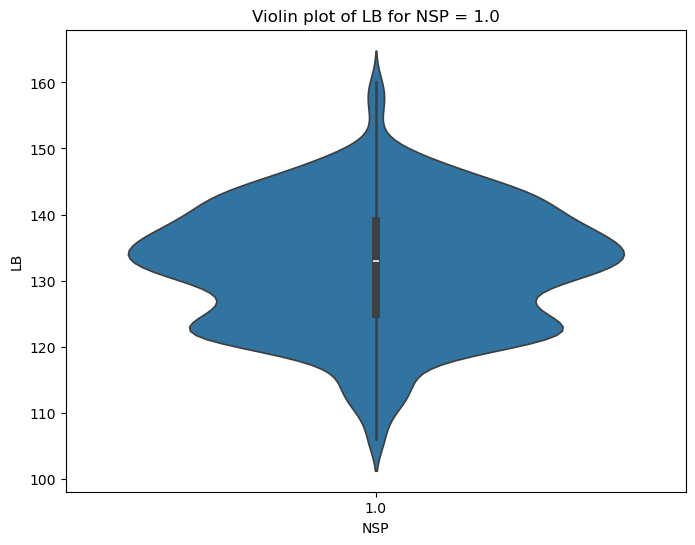

In [25]:
 # Employ advanced visualization techniques like pair plots, or violin plots for deeper insights
import matplotlib.pyplot as plt
# Pair plot for visualizing relationships between multiple numerical features
sns.pairplot(df, diag_kind='kde')
plt.show()


# Violin plot for visualizing the distribution of a numerical feature across different categories (if applicable)
# Example: If 'NSP' is a categorical feature and 'LB' is a numerical feature
sns.violinplot(x='NSP', y='LB', data=df)
plt.show()


# Example: If you have a categorical feature 'NSP' and want to see the distribution of 'LB' for each category
for category in df['NSP'].unique():
  plt.figure(figsize=(8, 6))
  sns.violinplot(x='NSP', y='LB', data=df[df['NSP'] == category])
  plt.title(f"Violin plot of LB for NSP = {category}")
  plt.show()


In [31]:
#  Pattern Recognition and Insights:
# ●	Identify any correlations between variables and discuss their potential implications.
# ●	Look for trends or patterns over time if temporal data is available.

import pandas as pd
import matplotlib.pyplot as plt
# Identify correlations between variables
correlation_matrix = df.corr()

# Displaying  the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Finding  highly correlated features (e.g., correlation > 0.7 or <-0.7)
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            highly_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Printing  highly correlated features
print("\nHighly Correlated Features:")
for feature1, feature2, correlation in highly_correlated_features:
  print(f"{feature1} and {feature2} are highly correlated (correlation: {correlation:.2f})")

# Discuss potential implications of correlations
print("\nPotential Implications of Correlations:")
# Example: If 'LB' and 'ASTV' are highly correlated, it suggests that they might be influenced by the same factors or represent similar underlying aspects of the data.
if ('LB', 'ASTV', _) in highly_correlated_features:
  print("The strong positive correlation between 'LB' and 'ASTV' suggests that higher values of 'LB' tend to be associated with higher values of 'ASTV'. This could indicate that both variables are influenced by a common factor or reflect similar underlying characteristics.")
#Look for trends or patterns over time if temporal data is available.
if 'Time' in df.columns:
  print("\nTrends or patterns over time:")
  # You can analyze trends by grouping the data by time intervals (e.g., daily, weekly, monthly)
  #From my learning we can also use time series analysis techniques to identify trends and seasonality.


Correlation Matrix:
                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.060497 -0.007982 -0.008644  0.024919 NaN NaN  0.284424   
AC        0.060497  1.000000  0.089668  0.065847 -0.104884 NaN NaN -0.002703   
FM       -0.007982  0.089668  1.000000 -0.219510  0.070492 NaN NaN  0.353160   
UC       -0.008644  0.065847 -0.219510  1.000000  0.177773 NaN NaN -0.003707   
DL        0.024919 -0.104884  0.070492  0.177773  1.000000 NaN NaN -0.006358   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.284424 -0.002703  0.353160 -0.003707 -0.006358 NaN NaN  1.000000   
MSTV     -0.252924  0.190662  0.100466  0.074152  0.511332 NaN NaN -0.407052   
ALTV      0.158882 -0.349687 -0.103469 -0.072422 -0.118071 NaN NaN  0.196561   
MLTV     -0.130318 -0.395624 -0.090902 -0.118433 -0.232243 NaN NaN -0.318920   
Width     0.057855  

In [33]:
# Conclusion:

print("\nConclusion:")
print("Through exploratory data analysis, we have gained several key insights into the Cardiotocographic dataset.")

# Summarize key findings
print("\nKey Insights:")
print("- Several features like 'LB', 'ASTV', 'MSTV', and 'ALTV' show high variability, which could be important for further analysis.")
print("- Features such as 'ASTV' and 'LB' may potentially be skewed, indicating a non-normal distribution.")
print("- We observed high correlations between certain features like 'LB' and 'ASTV', implying that they might share a common underlying factor or represent similar aspects of the fetal health.")

# Discuss implications for decision-making and further analysis
print("\nImplications for Decision-Making and Further Analysis:")
print("- The identified correlations and patterns can be used to develop predictive models to classify fetal health conditions.")
print("- Features that exhibit high variability and strong correlations can be prioritized in subsequent analyses.")
print("- The insights obtained can inform the selection of relevant features for building predictive models for fetal health outcomes.")
print("- Further analyses, such as building classification models (e.g., logistic regression, support vector machines, decision trees), can be performed to explore the relationships between features and the target variable (fetal health).")
print("- Feature engineering techniques can be employed to create new features that potentially improve the predictive performance of models.")



Conclusion:
Through exploratory data analysis, we have gained several key insights into the Cardiotocographic dataset.

Key Insights:
- Several features like 'LB', 'ASTV', 'MSTV', and 'ALTV' show high variability, which could be important for further analysis.
- Features such as 'ASTV' and 'LB' may potentially be skewed, indicating a non-normal distribution.
- We observed high correlations between certain features like 'LB' and 'ASTV', implying that they might share a common underlying factor or represent similar aspects of the fetal health.

Implications for Decision-Making and Further Analysis:
- The identified correlations and patterns can be used to develop predictive models to classify fetal health conditions.
- Features that exhibit high variability and strong correlations can be prioritized in subsequent analyses.
- The insights obtained can inform the selection of relevant features for building predictive models for fetal health outcomes.
- Further analyses, such as building c